In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/Deep Learning Project./CarCS1.csv')
data.head()

,Timestamp,Arbitration_ID,DLC,D0,D1,D2,D3,D4,D5,D6,D7,Class,SubClass
0,1.597759e+09,854,8,0,0,0.0,128.0,22.0,0.0,0.0,0.0,Normal,Normal
1,1.597759e+09,870,7,49,234,10.0,49.0,48.0,0.0,1.0,NaN,Normal,Normal
2,1.597759e+09,871,8,0,0,0.0,0.0,0.0,0.0,197.0,10.0,Normal,Normal
3,1.597759e+09,872,8,0,0,0.0,0.0,0.0,228.0,10.0,64.0,Normal,Normal
4,1.597759e+09,608,8,5,49,2.0,48.0,0.0,189.0,79.0,22.0,Normal,Normal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312119 entries, 0 to 3312118
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Timestamp       float64
 1   Arbitration_ID  int64  
 2   DLC             int64  
 3   D0              int64  
 4   D1              int64  
 5   D2              float64
 6   D3              float64
 7   D4              float64
 8   D5              float64
 9   D6              float64
 10  D7              float64
 11  Class           object 
 12  SubClass        object 
dtypes: float64(7), int64(4), object(2)
memory usage: 328.5+ MB


In [ ]:
data.isnull().sum()

Timestamp              0
Arbitration_ID         0
DLC                    0
D0                     0
D1                     0
D2                  5076
D3                  5076
D4                260174
D5                323584
D6                457045
D7                588023
Class                  0
SubClass               0
dtype: int64

In [ ]:
import statistics
for i in ('D2','D3','D4','D5','D6','D7'):
  m=statistics.mode(data[i])
  data[i]=data[i].fillna(m)
data.isnull().sum()

Timestamp         0
Arbitration_ID    0
DLC               0
D0                0
D1                0
D2                0
D3                0
D4                0
D5                0
D6                0
D7                0
Class             0
SubClass          0
dtype: int64

In [ ]:
for i in data.columns:
  if data[i].dtype=='object':
    data[i]=LabelEncoder().fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312119 entries, 0 to 3312118
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Timestamp       float64
 1   Arbitration_ID  int64  
 2   DLC             int64  
 3   D0              int64  
 4   D1              int64  
 5   D2              float64
 6   D3              float64
 7   D4              float64
 8   D5              float64
 9   D6              float64
 10  D7              float64
 11  Class           int64  
 12  SubClass        int64  
dtypes: float64(7), int64(6)
memory usage: 328.5 MB


In [ ]:
corr=data.corr()
print('correlation of input features with class',corr['Class'])
print('correlation of input features with subclass',corr['SubClass'])

correlation of input features with class Timestamp        -0.002028
Arbitration_ID    0.283307
DLC              -0.105086
D0                0.044855
D1                0.060482
D2               -0.010307
D3                0.090264
D4               -0.006933
D5                0.077482
D6                0.000398
D7                0.050168
Class             1.000000
SubClass          0.673914
Name: Class, dtype: float64
correlation of input features with subclass Timestamp         0.013192
Arbitration_ID    0.411829
DLC              -0.106092
D0                0.078727
D1                0.114319
D2                0.077346
D3                0.132142
D4                0.053879
D5                0.107520
D6                0.070116
D7                0.094972
Class             0.673914
SubClass          1.000000
Name: SubClass, dtype: float64


In [ ]:
y=data['Class']
y1=data['SubClass']
x=data.drop(['Class','SubClass'],axis=1)

In [ ]:
x=StandardScaler().fit_transform(x)

In [ ]:
from tensorflow.keras.utils import to_categorical
y1=to_categorical(y1,num_classes=5)

In [ ]:
x_train,x_test,y_train,y_test,y_train1,y_test1= train_test_split(x,y,y1,test_size=0.2,stratify=y1)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape,y_train1.shape,y_test1.shape

((2649695, 11), (662424, 11), (2649695,), (662424,), (2649695, 5), (662424, 5))

In [ ]:
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)

In [ ]:
x_train.shape,x_test.shape

((2649695, 11, 1), (662424, 11, 1))

In [ ]:
inputs = tf.keras.layers.Input(shape=(11,1), name='input')
main_branch=tf.keras.layers.Conv1D(16,kernel_size=3,activation='relu',name='shared_hidden_conv1')(inputs)
main_branch_1=tf.keras.layers.Conv1D(16,kernel_size=3,activation='relu',name='shared_hidden_conv2')(main_branch)
main_branch_2=tf.keras.layers.MaxPool1D(pool_size=3,name='shared_hidden_maxpool1')(main_branch_1)
main_branch_3=tf.keras.layers.BatchNormalization(name='shared_regularization_1')(main_branch_2)
main_branch_4=tf.keras.layers.GaussianNoise(0.15,name='shared_regularization_2')(main_branch_3)
main_branch_5=tf.keras.layers.GlobalAveragePooling1D(name='shared_gap')(main_branch_4)
task_1_op = tf.keras.layers.Dense(1, activation='sigmoid', name='class')(main_branch_5)

task_2_out= tf.keras.layers.Dense(4,activation='relu',name='hidden_subclass')(main_branch_5)
task_2_op = tf.keras.layers.Dense(5, activation='softmax', name='subclass')(task_2_out)

model = tf.keras.Model(inputs = inputs, outputs = [task_1_op, task_2_op])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 11, 1)]              0         []                            
                                                                                                  
 shared_hidden_conv1 (Conv1  (None, 9, 16)                64        ['input[0][0]']               
 D)                                                                                               
                                                                                                  
 shared_hidden_conv2 (Conv1  (None, 7, 16)                784       ['shared_hidden_conv1[0][0]'] 
 D)                                                                                               
                                                                                              

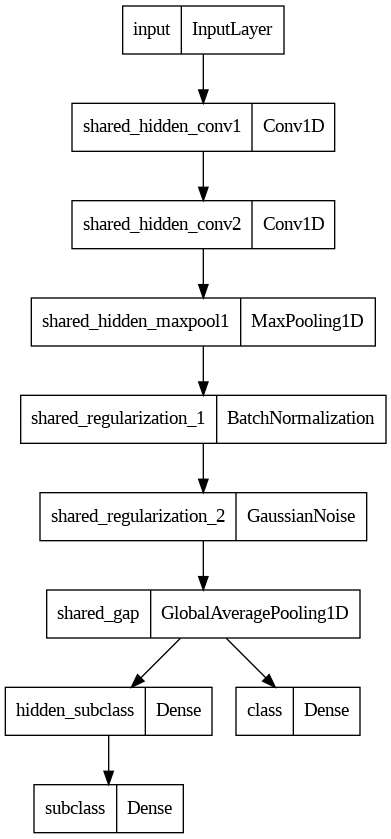

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
model.compile('adam',{'class':'binary_crossentropy','subclass':'categorical_crossentropy'},
              metrics={'class':['binary_accuracy','Precision','Recall','AUC'],'subclass':['categorical_accuracy','Precision','Recall','AUC']})

In [ ]:
model_history = model.fit({'input': x_train},
                            {'class': y_train, 'subclass': y_train1},
                            epochs=20, batch_size=35000, validation_data=({'input': x_test},{'class': y_test, 'subclass': y_test1}))

Epoch 1/20
76/76 [==============================] - 25s 288ms/step - loss: 1.8677 - class_loss: 0.5838 - subclass_loss: 1.2839 - class_binary_accuracy: 0.7628 - class_precision: 0.9669 - class_recall: 0.7654 - class_auc: 0.8168 - subclass_categorical_accuracy: 0.6231 - subclass_precision_1: 0.9056 - subclass_recall_1: 0.1145 - subclass_auc_1: 0.8166 - val_loss: 1.8336 - val_class_loss: 0.4777 - val_subclass_loss: 1.3559 - val_class_binary_accuracy: 0.9328 - val_class_precision: 0.9312 - val_class_recall: 1.0000 - val_class_auc: 0.7962 - val_subclass_categorical_accuracy: 0.8710 - val_subclass_precision_1: 0.0000e+00 - val_subclass_recall_1: 0.0000e+00 - val_subclass_auc_1: 0.9263
Epoch 2/20
76/76 [==============================] - 20s 263ms/step - loss: 1.2351 - class_loss: 0.3842 - subclass_loss: 0.8509 - class_binary_accuracy: 0.9353 - class_precision: 0.9714 - class_recall: 0.9570 - class_auc: 0.8774 - subclass_categorical_accuracy: 0.9379 - subclass_precision_1: 0.9810 - subclass_r

In [ ]:
model.evaluate({'input': x_train},
                            {'class': y_train, 'subclass': y_train1})

82803/82803 [==============================] - 210s 3ms/step - loss: 0.1855 - class_loss: 0.0893 - subclass_loss: 0.0962 - class_binary_accuracy: 0.9805 - class_precision: 0.9820 - class_recall: 0.9968 - class_auc: 0.9437 - subclass_categorical_accuracy: 0.9780 - subclass_precision_1: 0.9796 - subclass_recall_1: 0.9775 - subclass_auc_1: 0.9969


[0.18553148210048676,
 0.08931412547826767,
 0.09621735662221909,
 0.9804792404174805,
 0.9820017218589783,
 0.9968089461326599,
 0.9437128305435181,
 0.9779518246650696,
 0.9795529246330261,
 0.977536678314209,
 0.9968832731246948]

In [ ]:
model.evaluate({'input': x_test},{'class': y_test, 'subclass': y_test1})

20701/20701 [==============================] - 52s 3ms/step - loss: 0.1844 - class_loss: 0.0888 - subclass_loss: 0.0956 - class_binary_accuracy: 0.9806 - class_precision: 0.9821 - class_recall: 0.9968 - class_auc: 0.9444 - subclass_categorical_accuracy: 0.9780 - subclass_precision_1: 0.9796 - subclass_recall_1: 0.9776 - subclass_auc_1: 0.9969


[0.1844087392091751,
 0.08882685750722885,
 0.09558114409446716,
 0.9805728793144226,
 0.9820748567581177,
 0.9968367218971252,
 0.9443848133087158,
 0.9779869318008423,
 0.9796116352081299,
 0.9775989651679993,
 0.9969428181648254]

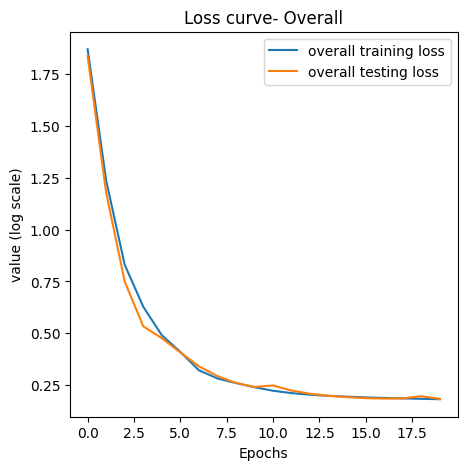

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Loss curve- Overall")
plt.plot(model_history.history["loss"], label="overall training loss")
plt.plot(model_history.history["val_loss"], label="overall testing loss")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

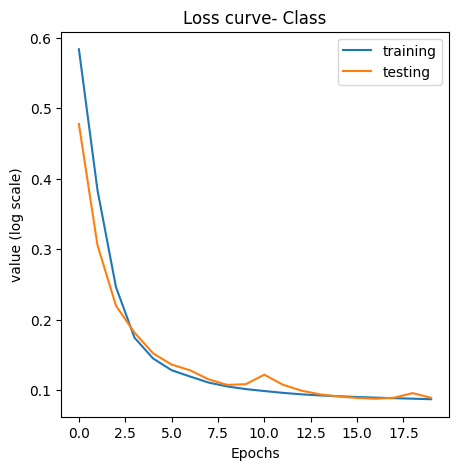

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Loss curve- Class")
plt.plot(model_history.history["class_loss"], label="training")
plt.plot(model_history.history["val_class_loss"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

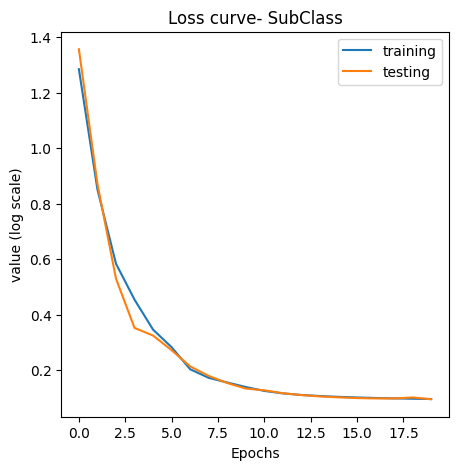

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Loss curve- SubClass")
plt.plot(model_history.history["subclass_loss"], label="training")
plt.plot(model_history.history["val_subclass_loss"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

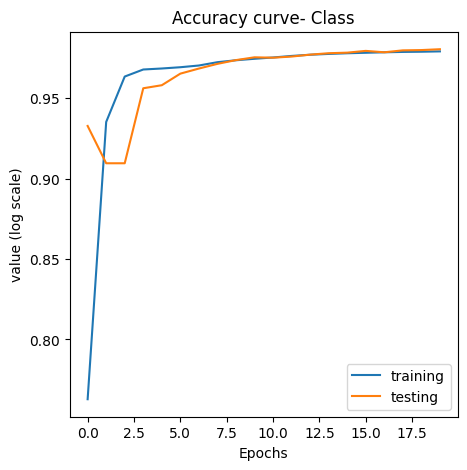

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Accuracy curve- Class")
plt.plot(model_history.history["class_binary_accuracy"], label="training")
plt.plot(model_history.history["val_class_binary_accuracy"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

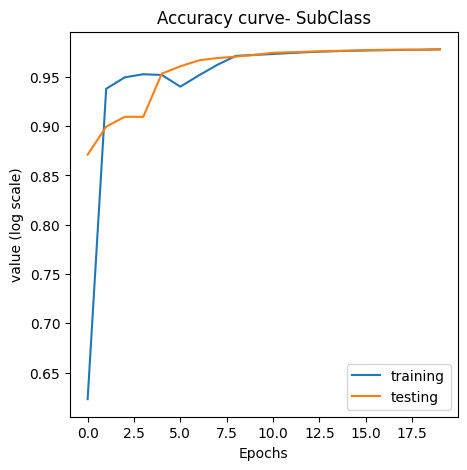

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Accuracy curve- SubClass")
plt.plot(model_history.history["subclass_categorical_accuracy"], label="training")
plt.plot(model_history.history["val_subclass_categorical_accuracy"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

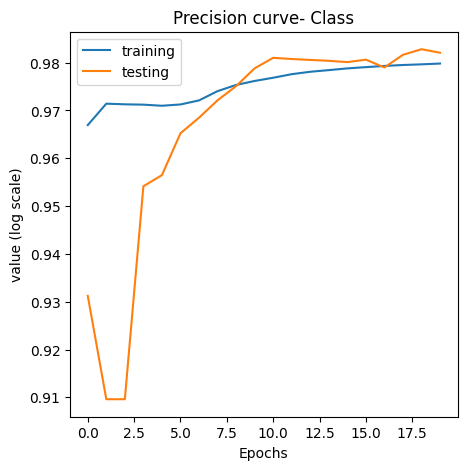

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Precision curve- Class")
plt.plot(model_history.history["class_precision"], label="training")
plt.plot(model_history.history["val_class_precision"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

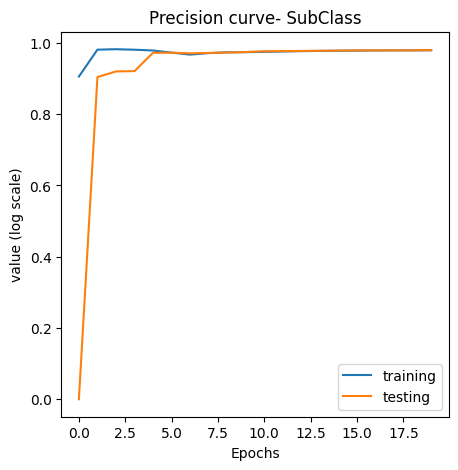

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Precision curve- SubClass")
plt.plot(model_history.history["subclass_precision_1"], label="training")
plt.plot(model_history.history["val_subclass_precision_1"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

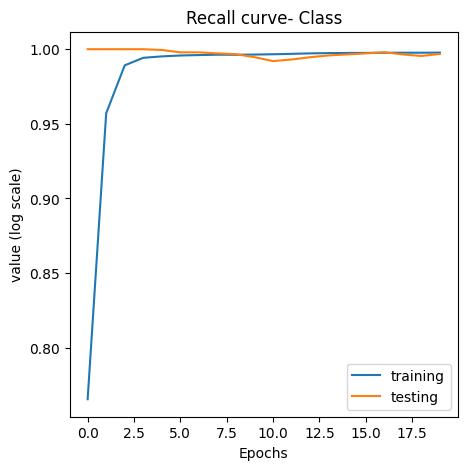

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Recall curve- Class")
plt.plot(model_history.history["class_recall"], label="training")
plt.plot(model_history.history["val_class_recall"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

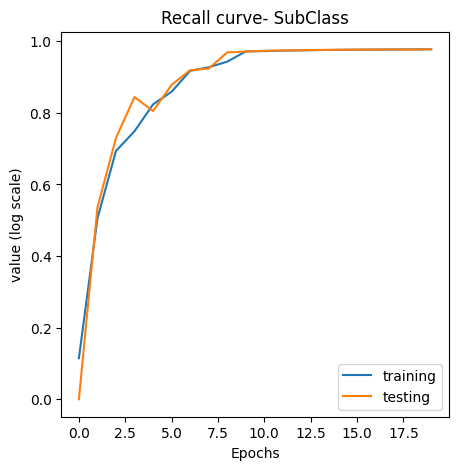

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Recall curve- SubClass")
plt.plot(model_history.history["subclass_recall_1"], label="training")
plt.plot(model_history.history["val_subclass_recall_1"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

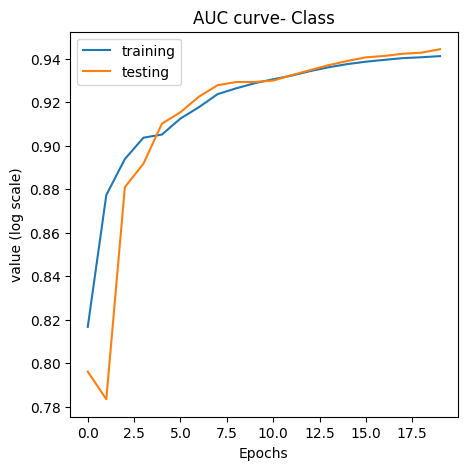

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("AUC curve- Class")
plt.plot(model_history.history["class_auc"], label="training")
plt.plot(model_history.history["val_class_auc"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

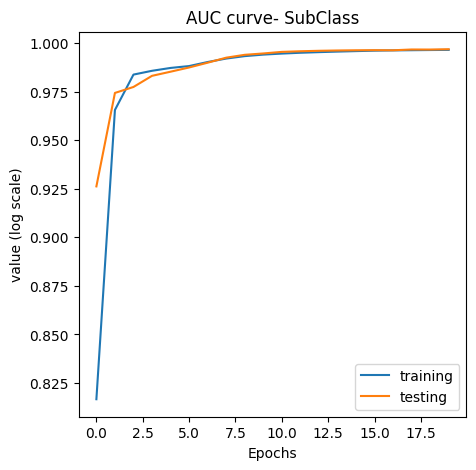

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("AUC curve- SubClass")
plt.plot(model_history.history["subclass_auc_1"], label="training")
plt.plot(model_history.history["val_subclass_auc_1"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

20701/20701 [==============================] - 39s 2ms/step
class classification CM-test


<Axes: >

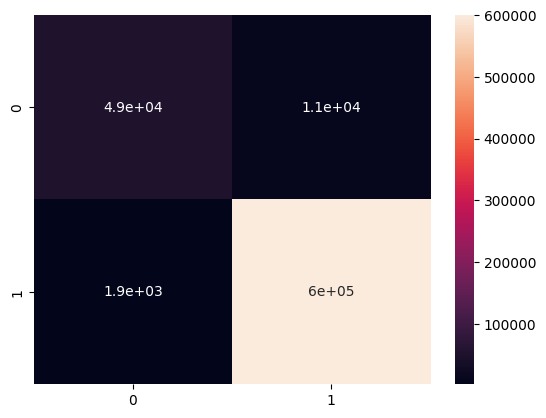

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred=model.predict(x_test)
y_pred_0 = (y_pred[0]>=0.5)
y_pred_1=y_pred[1]
y_pred_1= np.argmax(y_pred_1,axis=1)
y_test1= np.argmax(y_test1,axis=1)
print('class classification CM-test')
sns.heatmap(confusion_matrix(y_test,y_pred_0), annot=True)

subclass classification CM-test


<Axes: >

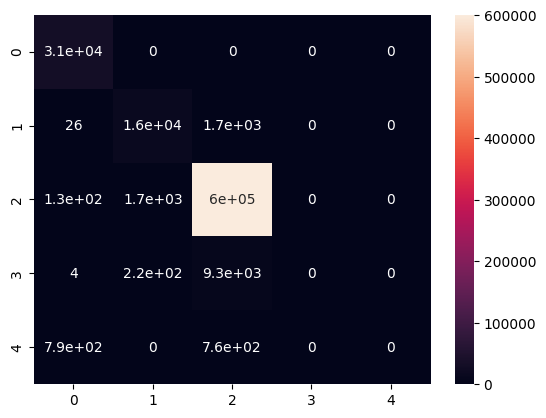

In [ ]:
print('subclass classification CM-test')
sns.heatmap(confusion_matrix(y_test1,y_pred_1), annot=True)

In [ ]:
print('classification report- class test')
print(classification_report(y_test,y_pred_0))

classification report- class test
              precision    recall  f1-score   support

           0       0.96      0.82      0.88     59882
           1       0.98      1.00      0.99    602542

    accuracy                           0.98    662424
   macro avg       0.97      0.91      0.94    662424
weighted avg       0.98      0.98      0.98    662424



In [ ]:
print('classification report- subclass test')
print(classification_report(y_test1,y_pred_1))

classification report- subclass test


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30836
           1       0.90      0.90      0.90     17976
           2       0.98      1.00      0.99    602542
           3       0.00      0.00      0.00      9519
           4       0.00      0.00      0.00      1551

    accuracy                           0.98    662424
   macro avg       0.57      0.58      0.57    662424
weighted avg       0.96      0.98      0.97    662424



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
